In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [6]:
# Define differential equation
def dhdt(t,h):
    dhdt = np.zeros((1,1))
    
    Qin = 4 # ft3/min
    A = 3.1416*4**2/4 # ft2
    
    dhdt[0] = -0.02*25*(2+h**2)/(9*3.1416*h**2)
    
    return dhdt

The value of Vf: 11.781


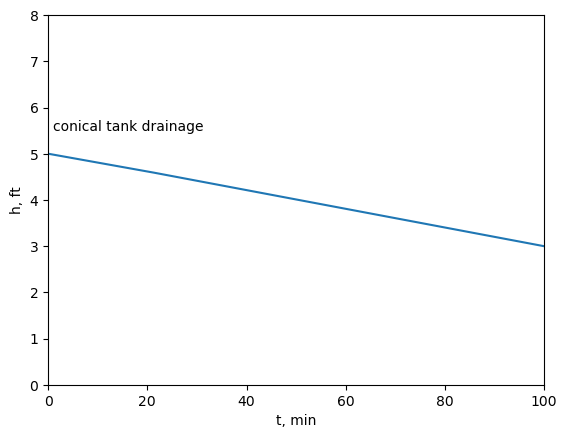

In [7]:
# Initial Conditions
initialheight = [5] #ft
trange = [0, 100] #min

# Solve ODE
results = solve_ivp(dhdt, trange, initialheight, method='RK45', rtol=1e-04, dense_output=True)

# Collect results
h, t = results.y, results.t

V = (9/75)*3.1416*h**3 # ft3
Vf = 0.25*(9/75)*3.1416*5**3
print("The value of Vf:",Vf)

# Plot results
plt.figure()
plt.plot(t, *h) # Don't worry about the *; they're just to "unpack" the arrays
plt.xlim([0, 100])
plt.xlabel('t, min')
plt.ylim([0, 8])
plt.ylabel('h, ft')
plt.text(1, 5.5, 'conical tank drainage')
plt.show()

In [8]:
# Default Python table 
print("Table 1")
display(pd.DataFrame([*h, t], index=['h', 't']).T)
print("Table 2")
display(pd.DataFrame([*V, t], index=['V', 't']).T)

Table 1


,h,t
0,5.000000,0.000000
1,4.996329,0.192206
2,4.959596,2.114269
3,4.589844,21.334892
4,2.998116,100.000000


Table 2


,V,t
0,47.124000,0.000000
1,47.020279,0.192206
2,45.990813,2.114269
3,36.452377,21.334892
4,10.159622,100.000000
